In [12]:
import os
import pandas as pd
import numpy as np
import random
import sys
import cv2
import csv

In [13]:
ls

ADL - Proj 1 - Train-Deploy-dia-retina-AWS-basic (1) (1).ipynb
Retina.ipynb
checkpoint
dataset/
diabetic_model/
diabetic_model2+aug_img/
model_retina/
proj1-model-checkpoint.data-00000-of-00001
proj1-model-checkpoint.index
trainLabels.csv


In [14]:
loc = 'dataset'

In [15]:
images = os.listdir(loc)

In [16]:
labels = pd.read_csv('trainLabels.csv')
labels.head()

,image,level
0,84_left,0
1,84_right,0
2,95_left,0
3,95_right,0
4,99_left,3


In [17]:
print('Total # of images:', len(images))

Total # of images: 1427


In [18]:
import tensorflow as tf
from tensorflow import keras

In [19]:
#from keras.preprocessing.image import array_to_img, img_to_array,load_img

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
#from tensorflow.keras.applications.vgg16 import array_to_img
#from tensorflow.keras.applications.vgg16 import decode_predictions
#from tensorflow.keras.applications.vgg16 import VGG16

In [20]:
os.path.sep

'/'

In [21]:
fullpath = os.path.join( loc, '876_left.jpeg' )

In [22]:
fullpath

'dataset/876_left.jpeg'

In [23]:
img = load_img(fullpath)
img = img = img_to_array(img)
img = img/255
img.shape

(2592, 3888, 3)

In [24]:
import matplotlib.pyplot as plt

In [25]:
%matplotlib inline

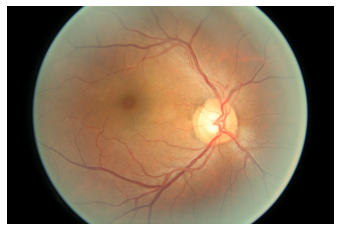

In [26]:
plt.imshow(img);
plt.axis('off');

In [27]:
scale_percent = 20               # percent of original size

width  = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)

dim = (width, height)
dim

(777, 518)

In [17]:
#?cv2.resize

In [28]:
# resize image
resized_img1 = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
resized_img2 = cv2.resize(img, dim, interpolation = cv2.INTER_NEAREST)
resized_img3 = cv2.resize(img, dim, interpolation = cv2.INTER_CUBIC) 
resized_img4 = cv2.resize(img, dim, interpolation = cv2.INTER_LANCZOS4) 

print('Resized Dimensions : ',resized_img1.shape)

Resized Dimensions :  (518, 777, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


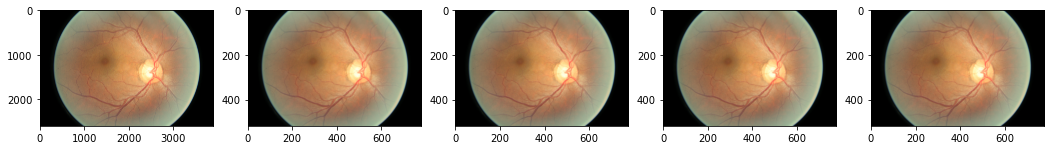

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(18, 4))

ax[0].imshow(img)
ax[1].imshow(resized_img1)
ax[2].imshow(resized_img2)
ax[3].imshow(resized_img3)
ax[4].imshow(resized_img4);

In [30]:
# global variables
ImageNameDataHash   = {}
uniquePatientIDList = []
count = 0

In [2]:
%%time

images = os.listdir(loc)


for imageFileName in images:
    imageFullPath = os.path.join(loc, imageFileName)
    
    if os.path.isdir(imageFullPath):
        continue
    
    img = load_img(imageFullPath)
    img = img_to_array(img)  
    img = img/255

    img = cv2.resize(img, dim, interpolation = cv2.INTER_NEAREST) 
    imageFileName = imageFileName.replace('.jpeg','')            # remove file extension
    ImageNameDataHash[str(imageFileName)] = img 
    count = count + 1


In [32]:
len(ImageNameDataHash)

1427

In [33]:
ImageNameDataHash['9940_left'].shape

(518, 777, 3)

In [34]:
ls

ADL - Proj 1 - Train-Deploy-dia-retina-AWS-basic (1) (1).ipynb
Retina.ipynb
checkpoint
dataset/
diabetic_model/
diabetic_model2+aug_img/
model_retina/
proj1-model-checkpoint.data-00000-of-00001
proj1-model-checkpoint.index
trainLabels.csv


In [35]:
labels = pd.read_csv('trainLabels.csv')
labels.head()

,image,level
0,84_left,0
1,84_right,0
2,95_left,0
3,95_right,0
4,99_left,3


In [36]:
labels['level'].unique()

array([0, 3, 1, 2, 4])

In [37]:
labels['level'].value_counts()

0    1016
2     230
1     113
4      36
3      32
Name: level, dtype: int64

In [38]:
import seaborn as sns

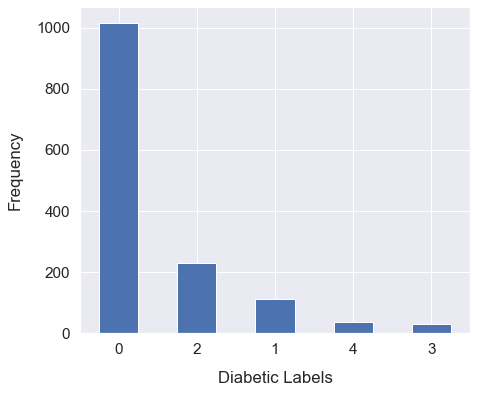

In [39]:
sns.set(font_scale=1.4)


labels['level'].value_counts().plot(kind = 'bar',  figsize=(7, 6), rot=0)
plt.xlabel("Diabetic Labels", labelpad=14)
plt.ylabel("Frequency", labelpad=14);



In [40]:
labels.shape

(1427, 2)

In [41]:
labels.columns

Index(['image', 'level'], dtype='object')

In [42]:
del ImageNameDataHash['9999_right']

In [43]:
training_img_df = pd.DataFrame(data=ImageNameDataHash.items(), columns=['image', 'data'])
training_img_df.head()

,image,data
0,8486_right,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.00..."
1,9869_right,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
2,9593_left,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
3,9300_left,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
4,9907_left,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."


In [44]:
training_img_df.shape

(1426, 2)

In [45]:
train_img_df = pd.merge(training_img_df, labels, on=['image'], how='inner')
train_img_df.head()

,image,data,level
0,8486_right,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.00...",0
1,9869_right,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",0
2,9593_left,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",0
3,9300_left,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",0
4,9907_left,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",2


In [46]:
list(set(train_img_df['image']) - set(training_img_df['image']))

[]

In [47]:
list(set(training_img_df['image']) - set(train_img_df['image']))

[]

In [38]:
#ImageNameDataHash['9999_right']
labels[labels.image == '9999_left']

,image,level
1426,9999_left,0


In [39]:
#ImageNameDataHash['9999_right']
labels[labels.image == '9999_right']

,image,level


In [48]:
train_img_df.shape

(1426, 3)

In [49]:
labels.shape

(1427, 2)

In [50]:
image_data = np.array(train_img_df['data'])

In [51]:
image_data.shape

(1426,)

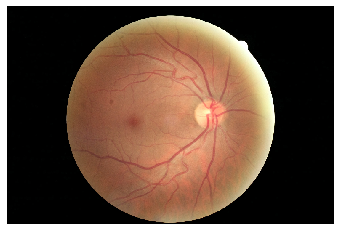

In [52]:
plt.imshow(image_data[0], interpolation='nearest');
plt.axis('off');

In [53]:
train_img_df.dtypes

image    object
data     object
level     int64
dtype: object

In [54]:
image_data = []

for data in ImageNameDataHash.values():
    image_data.append(data)

In [55]:
image_data = np.array(image_data)

In [56]:
image_data.shape

(1426, 518, 777, 3)

In [57]:
X = image_data

y = train_img_df['level']

In [58]:
X.shape

(1426, 518, 777, 3)

In [59]:
print('X.shape: ',X.shape) 
print('X[0].shape: ',X[0].shape) 

X.shape:  (1426, 518, 777, 3)
X[0].shape:  (518, 777, 3)


In [60]:
from tensorflow.keras.utils import to_categorical

In [61]:
NUM_CLASSES = len(np.unique(labels.level))
NUM_CLASSES

5

In [62]:
y = np.array(y)

# convert the labels from integers to vectors
y =  to_categorical(y, num_classes=NUM_CLASSES)

In [63]:
y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [64]:
y.shape

(1426, 5)

In [65]:
dim

(777, 518)

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [66]:
input_shape = (dim[1], dim[0], 3)
epochs  = 20
alpha = .005
batch_size  = 64
NUM_CLASSES = 5

In [67]:
aug = ImageDataGenerator(rotation_range=30, 
                         width_shift_range=0.1, 
                         height_shift_range=0.1, 
                         shear_range=0.2, 
                         zoom_range=0.2,
                         horizontal_flip=True, 
                         fill_mode="nearest")

In [68]:
aug_img = aug.flow(X, y)

In [69]:
aug_img

In [70]:
aug_img.y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [71]:
print(input_shape)

(518, 777, 3)


In [4]:
#input_shape = (1036, 1555, 3)

In [72]:

def createModel():
    tf.keras.backend.clear_session()
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.15))
    model.add(Dense(units= NUM_CLASSES, activation='softmax'))

    opt = Adam(learning_rate=alpha) # decay=INIT_LR / EPOCHS

    model.compile(loss="categorical_crossentropy", 
                  optimizer=opt, 
                  metrics=["accuracy"])
    
    return model

In [73]:
ls

ADL - Proj 1 - Train-Deploy-dia-retina-AWS-basic (1) (1).ipynb
Retina.ipynb
checkpoint
dataset/
diabetic_model/
diabetic_model2+aug_img/
model_retina/
proj1-model-checkpoint.data-00000-of-00001
proj1-model-checkpoint.index
trainLabels.csv


In [74]:
#model = tf.saved_model.load('diabetic_model2+aug_img/keras_metadata.pb')

In [75]:
diabetic_model = createModel()

In [76]:
diabetic_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 518, 777, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 516, 775, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 258, 387, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 258, 387, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 258, 387, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 385, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 192, 64)      0

In [64]:
%%time
history = diabetic_model.fit(X,
                            y,
                            batch_size = batch_size,
                            validation_split = 0.2,
                            epochs = epochs)

Epoch 1/20
18/18 [==============================] - 2362s 134s/step - loss: 273.8011 - accuracy: 0.6728 - val_loss: 0.8813 - val_accuracy: 0.7063
Epoch 2/20
18/18 [==============================] - 989s 50s/step - loss: 0.9733 - accuracy: 0.7140 - val_loss: 0.9154 - val_accuracy: 0.7063
Epoch 3/20
18/18 [==============================] - 3268s 61s/step - loss: 0.9525 - accuracy: 0.7140 - val_loss: 0.8865 - val_accuracy: 0.7063
Epoch 4/20
18/18 [==============================] - 2690s 156s/step - loss: 0.9361 - accuracy: 0.7140 - val_loss: 0.8813 - val_accuracy: 0.7063
Epoch 5/20
18/18 [==============================] - 1161s 64s/step - loss: 0.9417 - accuracy: 0.7140 - val_loss: 0.8872 - val_accuracy: 0.7063
Epoch 6/20
18/18 [==============================] - 700s 39s/step - loss: 0.9344 - accuracy: 0.7140 - val_loss: 0.8913 - val_accuracy: 0.7063
Epoch 7/20
18/18 [==============================] - 644s 36s/step - loss: 0.9618 - accuracy: 0.7140 - val_loss: 0.8905 - val_accuracy: 0.706

In [78]:
%%time
history2 = diabetic_model.fit(aug_img.x,
                              aug_img.y,
                              batch_size = batch_size,
                              validation_split = 0.3,
                             # validation_data = (X_test2,y_test2),
                              epochs = 2,
                              verbose =1)

Epoch 1/2
16/16 [==============================] - 2261s 139s/step - loss: 86.1362 - accuracy: 0.5912 - val_loss: 0.9380 - val_accuracy: 0.7313
Epoch 2/2
16/16 [==============================] - 1866s 116s/step - loss: 0.9831 - accuracy: 0.7044 - val_loss: 0.8988 - val_accuracy: 0.7313
CPU times: user 2h 14min 45s, sys: 1h 56min 54s, total: 4h 11min 39s
Wall time: 1h 8min 47s


In [79]:
diabetic_model.save_weights('proj1-model-checkpoint')

In [80]:
test_loss, test_acc = diabetic_model.evaluate(x = aug_img.x, y = aug_img.y)
print('Test loss: {} Test Acc: {}'.format(test_loss, test_acc))

45/45 [==============================] - 389s 8s/step - loss: 0.9760 - accuracy: 0.7125
Test loss: 0.9759610295295715 Test Acc: 0.7124824523925781


In [82]:
plt.style.use('ggplot')

def plot_history(history):
    acc     = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    loss     = history.history['loss']
    val_loss = history.history['val_loss']
    
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.ylim(.65, 0.75)
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

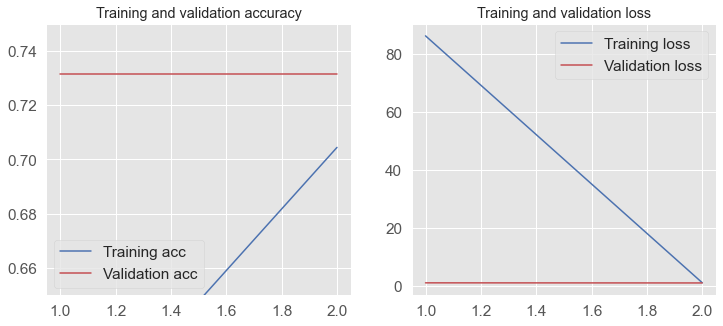

In [83]:
plot_history(history2)

In [84]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(aug_img.x, aug_img.y, test_size=0.33, random_state=42)

In [86]:
preditions3 = diabetic_model.predict(X_test2)


p3 = [preditions3 >= 0.5]
p3 = np.array(p3)*1
p3 = p3[0]

In [87]:
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix

In [88]:
print(classification_report(y_test2, p3,  zero_division=1))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       335
           1       1.00      0.00      0.00        44
           2       1.00      0.00      0.00        76
           3       1.00      0.00      0.00         6
           4       1.00      0.00      0.00        10

   micro avg       0.71      0.71      0.71       471
   macro avg       0.94      0.20      0.17       471
weighted avg       0.79      0.71      0.59       471
 samples avg       0.71      0.71      0.71       471



In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test2, p3)*100

71.12526539278132

## No Image Generation

In [187]:
preditions2 = diabetic_model.predict(X_test2)

preditions2 

array([[0.7389844 , 0.06546244, 0.14697053, 0.02641502, 0.02216768],
       [0.7389844 , 0.06546244, 0.14697053, 0.02641502, 0.02216768],
       [0.7389844 , 0.06546244, 0.14697053, 0.02641502, 0.02216768],
       ...,
       [0.7389844 , 0.06546244, 0.14697053, 0.02641502, 0.02216768],
       [0.7389844 , 0.06546244, 0.14697053, 0.02641502, 0.02216768],
       [0.7389844 , 0.06546244, 0.14697053, 0.02641502, 0.02216768]],
      dtype=float32)

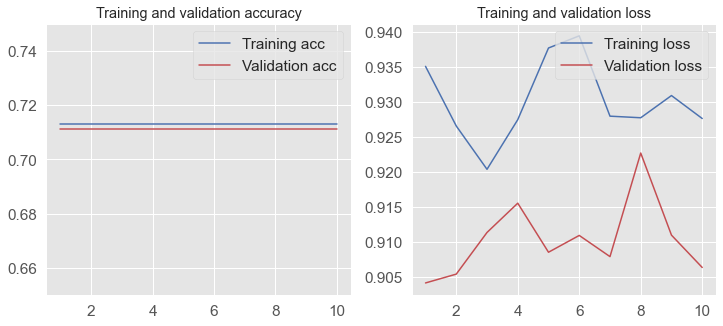

In [188]:
plot_history(history2)

In [201]:
?diabetic_model.evaluate

In [189]:
p2 = [preditions2 >= 0.5]
p2 = np.array(p2)*1
p2 = p2[0]

In [200]:
test_loss, test_acc = diabetic_model.evaluate(x = X_test2, y =y_test2)
print('Test loss: {} Test Acc: {}'.format(test_loss, test_acc))

15/15 [==============================] - 37s 2s/step - loss: 0.9064 - accuracy: 0.7113
Test loss: 0.9063958525657654 Test Acc: 0.7112526297569275


In [211]:
tf.keras.models.save_model(
    diabetic_model,
    'model_retina',
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)


INFO:tensorflow:Assets written to: model_retina/assets


In [212]:
ls

ADL - Proj 1 - Train-Deploy-dia-retina-AWS-basic (1) (1).ipynb
Retina.ipynb
checkpoint
dataset/
diabetic_model/
diabetic_model2+aug_img/
model_retina/
proj1-model-checkpoint.data-00000-of-00001
proj1-model-checkpoint.index
trainLabels.csv


In [194]:
print(classification_report(y_test2, p2,  zero_division=1))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       335
           1       1.00      0.00      0.00        44
           2       1.00      0.00      0.00        76
           3       1.00      0.00      0.00         6
           4       1.00      0.00      0.00        10

   micro avg       0.71      0.71      0.71       471
   macro avg       0.94      0.20      0.17       471
weighted avg       0.79      0.71      0.59       471
 samples avg       0.71      0.71      0.71       471



In [195]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test2, p2)*100

71.12526539278132

In [193]:
multilabel_confusion_matrix(y_test2, p2)

array([[[  0, 136],
        [  0, 335]],

       [[427,   0],
        [ 44,   0]],

       [[395,   0],
        [ 76,   0]],

       [[465,   0],
        [  6,   0]],

       [[461,   0],
        [ 10,   0]]])

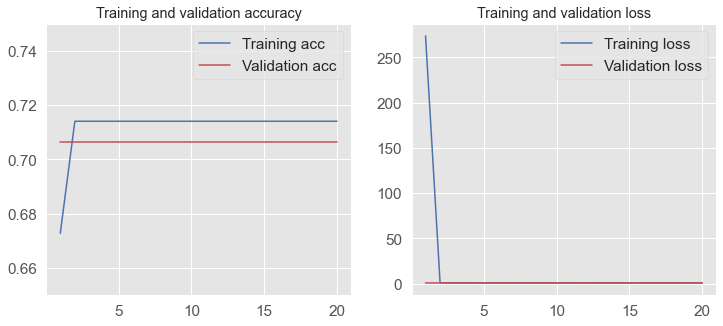

In [76]:
plot_history(history)

In [69]:
diabetic_model.save('diabetic_model')

INFO:tensorflow:Assets written to: diabetic_model/assets


In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [91]:
l = labels.level.unique()

In [96]:
preditions = diabetic_model.predict(X_test)

preditions 

array([[0.77225363, 0.07051595, 0.11905763, 0.01975572, 0.018417  ],
       [0.77225363, 0.07051595, 0.11905763, 0.01975572, 0.018417  ],
       [0.77225363, 0.07051595, 0.11905763, 0.01975572, 0.018417  ],
       ...,
       [0.77225363, 0.07051595, 0.11905763, 0.01975572, 0.018417  ],
       [0.77225363, 0.07051595, 0.11905763, 0.01975572, 0.018417  ],
       [0.77225363, 0.07051595, 0.11905763, 0.01975572, 0.018417  ]],
      dtype=float32)

In [209]:
test_loss, test_acc = diabetic_model.evaluate(x = X_test, y = y_test)
print('Test loss: {} Test Acc: {}'.format(test_loss, test_acc))

15/15 [==============================] - 57s 3s/step - loss: 0.9064 - accuracy: 0.7113
Test loss: 0.9063958525657654 Test Acc: 0.7112526297569275


In [97]:
preditions.shape

(471, 5)

In [123]:
p = [preditions >= 0.5]
#p = p.reshape(-1,1)

In [148]:
p = np.array(p)*1
p = p[0]

In [149]:
y_test.shape

(471, 5)

In [164]:
accuracy_score(y_test, p)*100

71.12526539278132

In [165]:
# ?classification_report

In [167]:
print(classification_report(y_test, p,  zero_division=1))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       335
           1       1.00      0.00      0.00        44
           2       1.00      0.00      0.00        76
           3       1.00      0.00      0.00         6
           4       1.00      0.00      0.00        10

   micro avg       0.71      0.71      0.71       471
   macro avg       0.94      0.20      0.17       471
weighted avg       0.79      0.71      0.59       471
 samples avg       0.71      0.71      0.71       471



In [208]:
print(multilabel_confusion_matrix(y_test, p))

[[[  0 136]
  [  0 335]]

 [[427   0]
  [ 44   0]]

 [[395   0]
  [ 76   0]]

 [[465   0]
  [  6   0]]

 [[461   0]
  [ 10   0]]]


In [207]:
from sklearn.metrics import precision_recall_fscore_support

[print(x) for x in precision_recall_fscore_support(y_test, p, zero_division=1)]

[0.71125265 1.         1.         1.         1.        ]
[1. 0. 0. 0. 0.]
[0.83126551 0.         0.         0.         0.        ]
[335  44  76   6  10]


[None, None, None, None]

In [91]:
input_shape

(518, 777, 3)

## Transfer Learning

In [92]:
import numpy as np
from tqdm import tqdm
import math
import os

from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K
K.clear_session()
import itertools
import matplotlib.pyplot as plt
import cv2
import matplotlib.cm as cm

# from tensorflow.keras.utils import to_categorical
# from sklearn.preprocessing import LabelBinarizer,LabelEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix

import tensorflow as tf

tf.keras.backend.clear_session()


baseModel = tf.keras.applications.VGG19(weights="imagenet", 
                                     include_top= False,
                                     input_shape=input_shape)

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.4)(headModel)
headModel = Dense(5, activation="softmax")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)

In [93]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 518, 777, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 518, 777, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 518, 777, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 259, 388, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 259, 388, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 259, 388, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 129, 194, 128)     0     

In [269]:
# keras.utils.plot_model(model, "my_first_model.png")

In [270]:
# pip install pydot

In [95]:
opt = Adam(learning_rate=alpha)
           
from tensorflow.keras import optimizers
           
opt2 = optimizers.SGD(learning_rate=0.0001, momentum=0.9)

model.compile(loss="categorical_crossentropy", 
                  optimizer=opt2, 
                  metrics=["accuracy"])

In [ ]:
# %%time


# results = model.fit(aug_img,
#                               #X_train2, 
#                               #y_train2, 
#                               epochs=5, 
#                               verbose=1, 
#                               #samples_per_epoch = datasize/bs,
#                               #validation_split=0.3,
#                               use_multiprocessing = False)

Epoch 1/5


In [ ]:
# %%time
# history3 = model.fit(X_train2,
#                     y_train2,
#                     batch_size = batch_size,
#                     validation_data = (X_test2,y_test2),
#                     epochs = 5)

Epoch 1/5


In [2]:
# %%time
# results = model.fit(aug_img.x,
#                     aug_img.y,
#                     batch_size = batch_size,
#                     validation_split = 0.3,
#                     # validation_data = (X_test2,y_test2),
#                     epochs = 2,
#                     verbose =1)

In [ ]:
# print('argv', argv[1])


# image = load_img(argv[1], target_size = (244,244) )

# image = img_to_array(image)

# #image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# #image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# image = cv2.resize(image,(224,224))     # resize image to match model's expected sizing
# image = image.reshape(1,224,224,3) # return the image with shaping that TF wants.

# #image = image.reshape((1,224,224,3))
# image =  preprocess_input(image)

# predictions = model.predict(image)

# labels = decode_predictions(predictions)

# pprint(labels)
# label = labels[0][0]

# print('%s: %.2f%%' % (label[1], label[2]*100))

